## Notebook imports and Packages

In [41]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm #color map
from sympy import symbols, diff

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

%matplotlib inline

## Cost Functions

### Example 1
### $f(x) = x^2 + x + 1 $

In [3]:
def f(x):
    return x**2 + x + 1;

In [4]:
#Making the data using numpy
#np.linspace generates a sequence of 'num' at equal intervals from 'start' to 'stop'
x_1 = np.linspace(start=-3, stop=3, num=500)

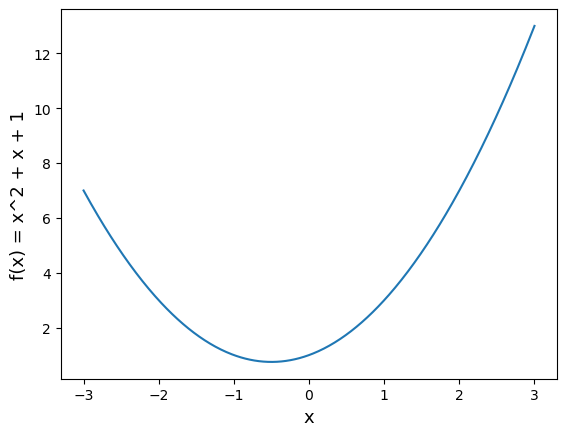

In [5]:
#Plotting our data
plt.xlabel("x", fontsize=13)
plt.ylabel("f(x) = x^2 + x + 1", fontsize=13)
plt.plot(x_1, f(x_1))
plt.show()

### Find minima - slopes and derivatives

In [6]:
def df(x):
    return 2*x + 1;

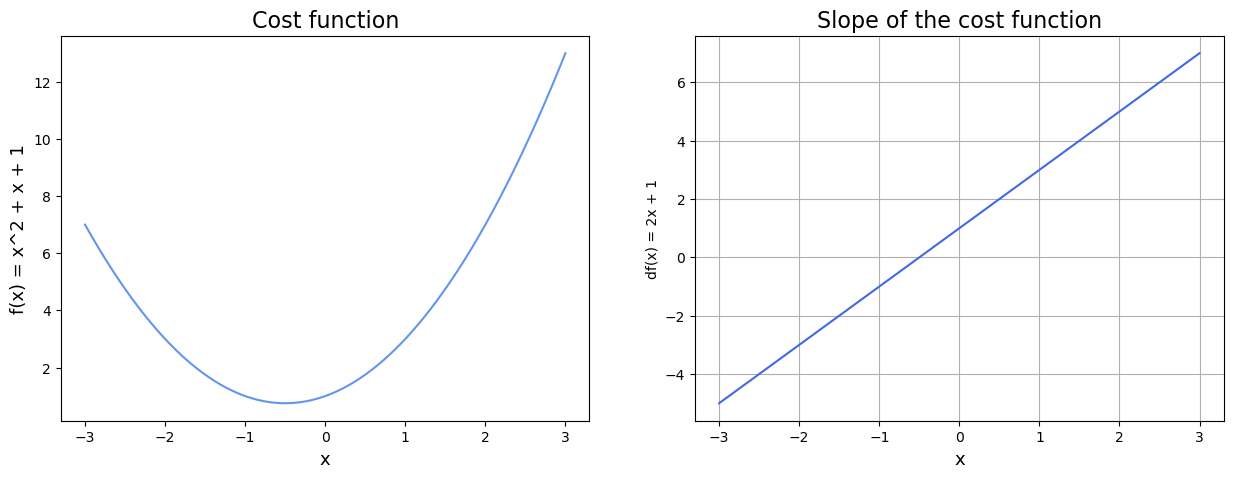

In [7]:
#Plotting function and derivative side by side

plt.figure(figsize=[15, 5])

plt.subplot(1, 2, 1)  # 1 row, 2 cols, index=1

plt.title("Cost function", fontsize=16)
plt.xlabel("x", fontsize=13)
plt.ylabel("f(x) = x^2 + x + 1", fontsize=13)
plt.plot(x_1, f(x_1), color="cornflowerblue")


plt.subplot(1, 2, 2)   # index=2

plt.grid()
plt.title("Slope of the cost function", fontsize=16)
plt.xlabel("x", fontsize=13)
plt.ylabel("df(x) = 2x + 1")
plt.plot(x_1, df(x_1), color="royalblue")
plt.show()

## Gradient Descent algorithm

In [8]:
def gradient_descent(derivative_function, initial_guess, 
                     step_multiplier=0.02, precision=0.001, max_iterations=500):
    x=initial_guess
    prev=0
    x_list=[]
    slope_list=[]
    for i in range(max_iterations):
        prev=x
        gradient=derivative_function(x)
        x_list.append(x)
        slope_list.append(gradient)
        if(abs(gradient) < precision):
            break
        x=prev-step_multiplier*gradient
        
    return x, x_list, slope_list

In [9]:
local_minima, x_list, slope_list = gradient_descent(derivative_function=df, initial_guess=3, 
                                                    step_multiplier=0.1, precision=0.0001, max_iterations=500)
print("Local Minimum occurs at: ", local_minima)
print("Number of steps taken: ", len(x_list))

# for i in range(len(x_list)):
#     print("x={}, slope={}".format(x_list[i], slope_list[i]))

Local Minimum occurs at:  -0.4999500463307553
Number of steps taken:  51


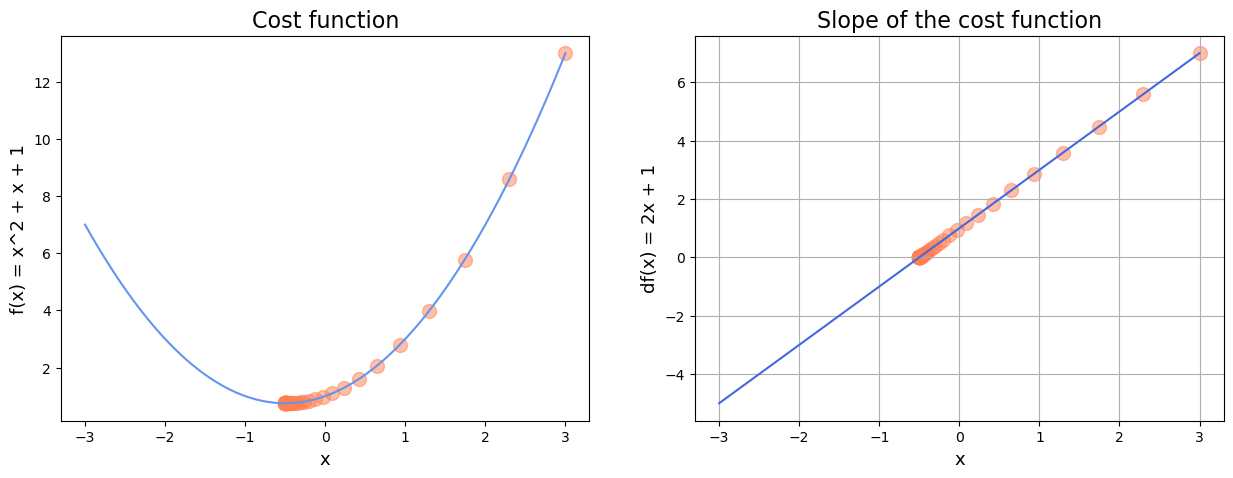

In [10]:
#Gradient descent calculations

plt.figure(figsize=[15, 5])

plt.subplot(1, 2, 1)  # 1 row, 2 cols, index=1

plt.title("Cost function", fontsize=16)
plt.xlabel("x", fontsize=13)
plt.ylabel("f(x) = x^2 + x + 1", fontsize=13)
plt.plot(x_1, f(x_1), color="cornflowerblue")
plt.scatter(x_list, f(np.array(x_list)), color="coral", s=100, alpha=0.5)


plt.subplot(1, 2, 2)   # index=2

plt.grid()
plt.title("Slope of the cost function", fontsize=16)
plt.xlabel("x", fontsize=13)
plt.ylabel("df(x) = 2x + 1", fontsize=13)
plt.plot(x_1, df(x_1), color="royalblue")
plt.scatter(x_list, slope_list, color="coral", s=100, alpha=0.5)

plt.show()

## Example 2 - Multiple minima vs Intial guess

### $g(x) = x^4 - 4x^2 + 5$

In [11]:
def g(x):
    return x**4 - 4*(x**2) + 5

def dg(x):
    return 4*(x**3) - 8*x


In [12]:
#Making the data using numpy
x_2 = np.linspace(start=-2, stop=2, num=1000)

In [13]:
local_minima, x_list, slope_list = gradient_descent(derivative_function=dg, initial_guess=0.1, 
                                                    step_multiplier=0.02, precision=0.001, max_iterations=500)
print("Local Minimum occurs at: ", local_minima)
print("Number of steps taken: ", len(x_list))

# for i in range(len(x_list)):
#     print("x={}, slope={}".format(x_list[i], slope_list[i]))

Local Minimum occurs at:  1.4141684994051522
Number of steps taken:  44


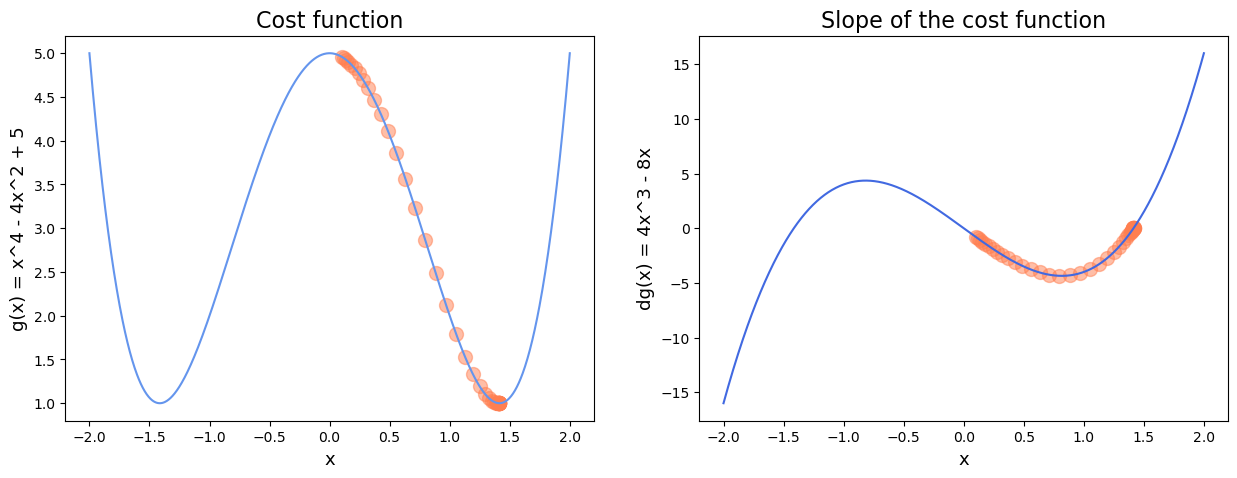

In [14]:
#Plotting

plt.figure(figsize=[15, 5])

plt.subplot(1, 2, 1)
plt.title("Cost function", fontsize=16)
plt.xlabel("x", fontsize=13)
plt.ylabel("g(x) = x^4 - 4x^2 + 5", fontsize=13)
plt.plot(x_2, g(x_2), color="cornflowerblue")
plt.scatter(x_list, g(np.array(x_list)), color="coral", s=100, alpha=0.5)

plt.subplot(1, 2, 2)
plt.title("Slope of the cost function", fontsize=16)
plt.xlabel("x", fontsize=13)
plt.ylabel("dg(x) = 4x^3 - 8x", fontsize=13)
plt.plot(x_2, dg(x_2), color="royalblue")
plt.scatter(x_list, slope_list, color="coral", s=100, alpha=0.5)

plt.show()

## Example 3 - Divergence and  Overflow

### $h(x) = x^5 - 2x^4 + 2$

In [15]:
def h(x):
    return x**5 - 2*(x**4) + 2

def dh(x):
    return 5*(x**4) - 8*(x**3)

In [16]:
#Making data using numpy
x_3 = np.linspace(start=-2.5, stop=2.5, num=1000)

In [17]:
local_minima, x_list, slope_list = gradient_descent(derivative_function=dh, initial_guess=0.2)

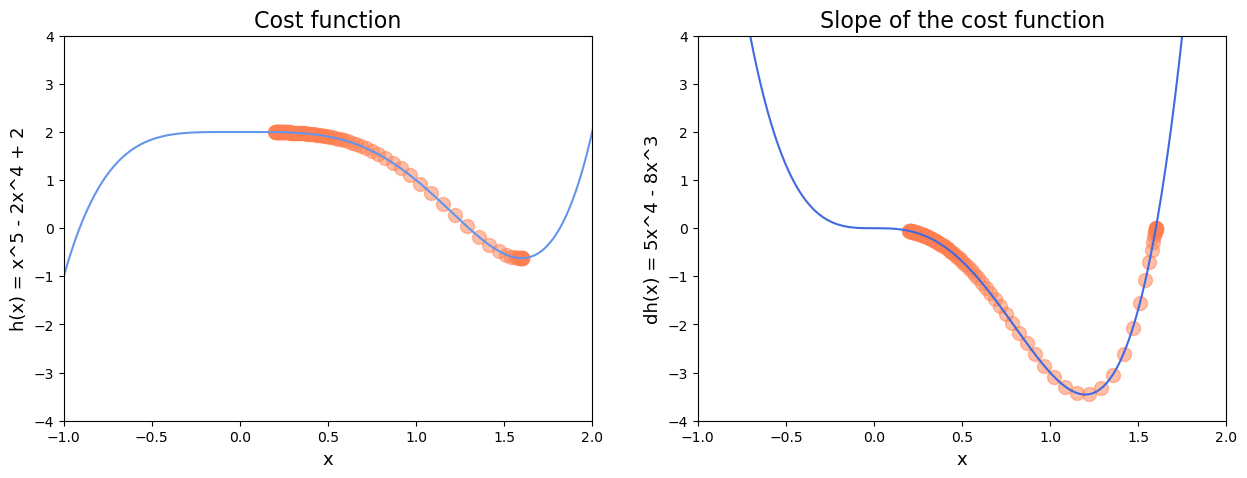

In [18]:
plt.figure(figsize=[15, 5])

plt.subplot(1, 2, 1)
plt.title("Cost function", fontsize=16)
plt.xlabel("x", fontsize=13)
plt.ylabel("h(x) = x^5 - 2x^4 + 2", fontsize=13)
plt.xlim(-1, 2)
plt.ylim(-4, 4)
plt.plot(x_3, h(x_3), color="cornflowerblue")
plt.scatter(x_list, h(np.array(x_list)), color="coral", s=100, alpha=0.5)

plt.subplot(1, 2, 2)
plt.title("Slope of the cost function", fontsize=16)
plt.xlabel("x", fontsize=13)
plt.ylabel("dh(x) = 5x^4 - 8x^3", fontsize=13)
plt.xlim(-1, 2)
plt.ylim(-4, 4)
plt.plot(x_3, dh(x_3), color="royalblue")
plt.scatter(x_list, slope_list, color="coral", s=100, alpha=0.5)

plt.show()

## Learning Rate - Gamma
### (The step_multiplier)

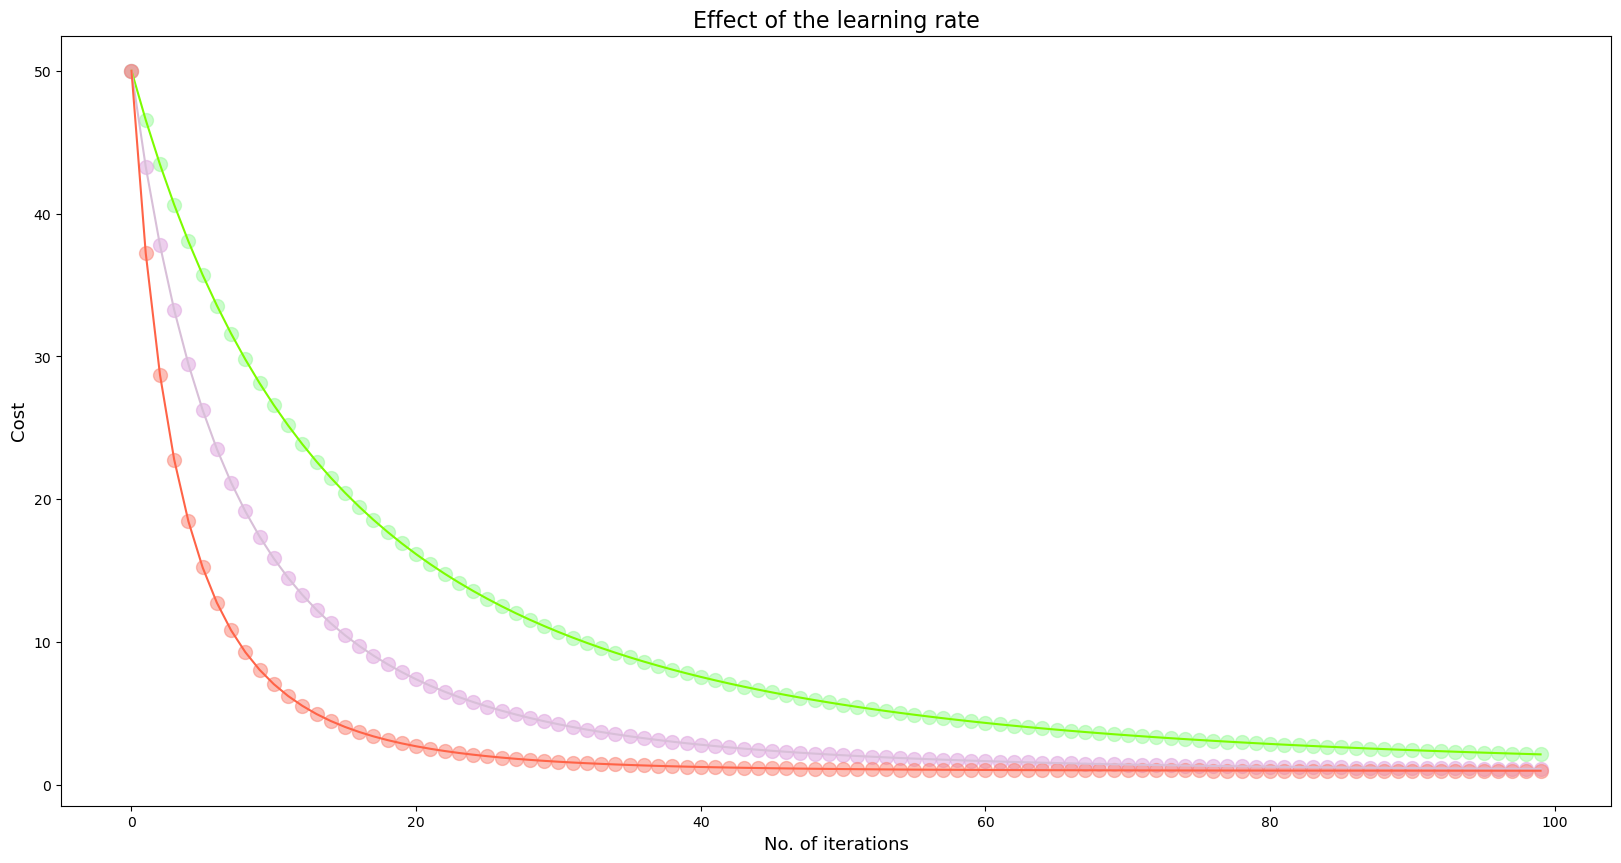

In [19]:
n=100

low_gamma = gradient_descent(derivative_function=dg, initial_guess=3,
                            step_multiplier=0.0005, precision=0.0001, 
                             max_iterations=n)
mid_gamma = gradient_descent(derivative_function=dg, initial_guess=3,
                            step_multiplier=0.001, precision=0.0001, 
                             max_iterations=n)
high_gamma = gradient_descent(derivative_function=dg, initial_guess=3,
                            step_multiplier=0.002, precision=0.0001, 
                             max_iterations=n)

plt.figure(figsize=[20, 10])
plt.title("Effect of the learning rate", fontsize=16)
plt.xlabel("No. of iterations", fontsize=13)
plt.ylabel("Cost", fontsize=13)

x=list(range(0, n))

#Low Learning rate
y_low=g(np.array(low_gamma[1]))
plt.plot(x, y_low, color="lawngreen")
plt.scatter(x, y_low, color="palegreen", s=100,alpha=0.5)

#Mid Learning rate
y_mid=g(np.array(mid_gamma[1]))
plt.plot(x, y_mid, color="thistle")
plt.scatter(x, y_mid, color="plum", s=100,alpha=0.5)

#High Learning rate
y_high=g(np.array(high_gamma[1]))
plt.plot(x, y_high, color="tomato")
plt.scatter(x, y_high, color="salmon", s=100,alpha=0.5)

plt.show()

### Gradient Descent depends on 
-  Initial Guess
-  Learning Rate

## Example 4 - Multivariable cost functions and 3D charts
### Minimize $f(x, y) = \frac{1}{3^{-x^2-y^2}+1}$
### Minimize $f(x, y) = \frac{1}{r+1}$ where $r = 3^{-x^2-y^2}$

In [20]:
def f(x, y):
    r=3**(-x**2 -y**2)
    return 1/(r+1)

In [21]:
# Make data using numpy
x_4 = np.linspace(start=-2, stop=2, num=200)
y_4 = np.linspace(start=-2, stop=2, num=200)

x_4, y_4 = np.meshgrid(x_4, y_4)

C:\Users\KIIT\AppData\Local\Temp\ipykernel_31092\3383648028.py:3: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  axes=fig.gca(projection="3d")


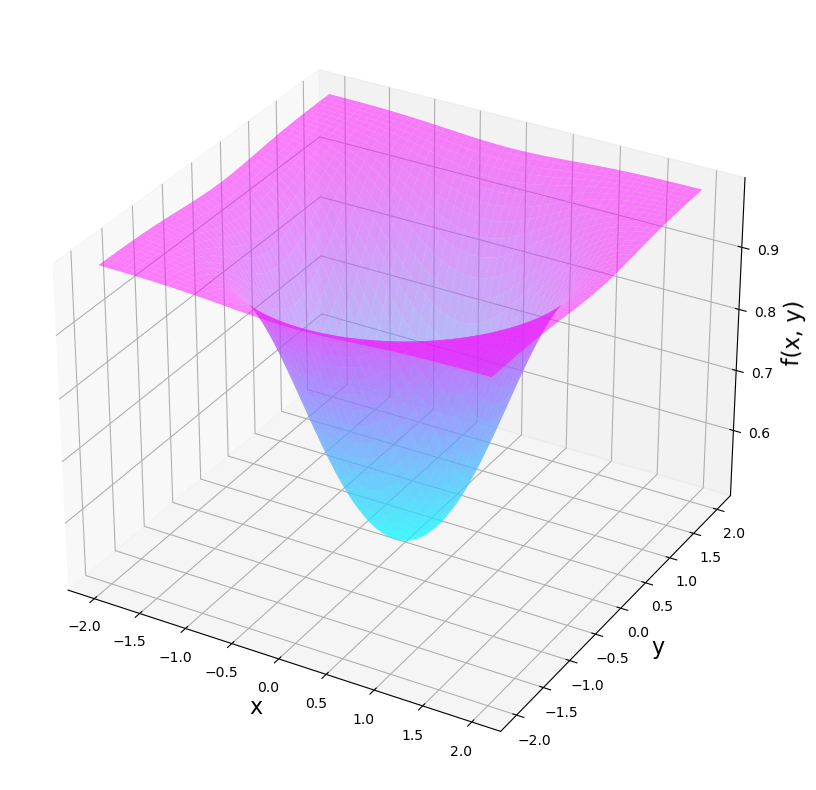

In [22]:
# Generating 3D plot
fig=plt.figure(figsize=[10, 10])
axes=fig.gca(projection="3d")

axes.set_xlabel("x", fontsize=16)
axes.set_ylabel("y", fontsize=16)
axes.set_zlabel("f(x, y)", fontsize=16)
axes.plot_surface(x_4, y_4, f(x_4, y_4), cmap=cm.cool, alpha=0.5)
plt.show()

## Partial derivative using symbolic computation

In [23]:
a, b = symbols('x, y')

## Batch Gradient Descent algorithm (using sympy)

In [24]:
step_multiplier=0.1
max_iterations=200
params=np.array([1.8, 1.0])   #Initial guess
values_array=params.reshape(1, 2)

for i in range(max_iterations):
    #calculate slope
    gradient_x=diff(f(a,b), a).evalf(subs={a:params[0], b:params[1]})
    gradient_y=diff(f(a,b), b).evalf(subs={a:params[0], b:params[1]})
    gradients=np.array([gradient_x, gradient_y])
    
    #desecend
    params=params-step_multiplier*gradients
    values_array=np.append(values_array, params.reshape(1, 2), axis=0)

print("Values in gradient array: ", gradients)
print("Minimum occurs at x = ", params[0])
print("Minimum occurs at y = ", params[1])
print("Cost at this minimum = ", f(params[0], params[1]))

Values in gradient array:  [0.000461440542096373 0.000256355856720208]
Minimum occurs at x =  0.000793898510134722
Minimum occurs at y =  0.000441054727852623
Cost at this minimum =  0.500000226534985


C:\Users\KIIT\AppData\Local\Temp\ipykernel_31092\523652725.py:3: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  axes=fig.gca(projection="3d")


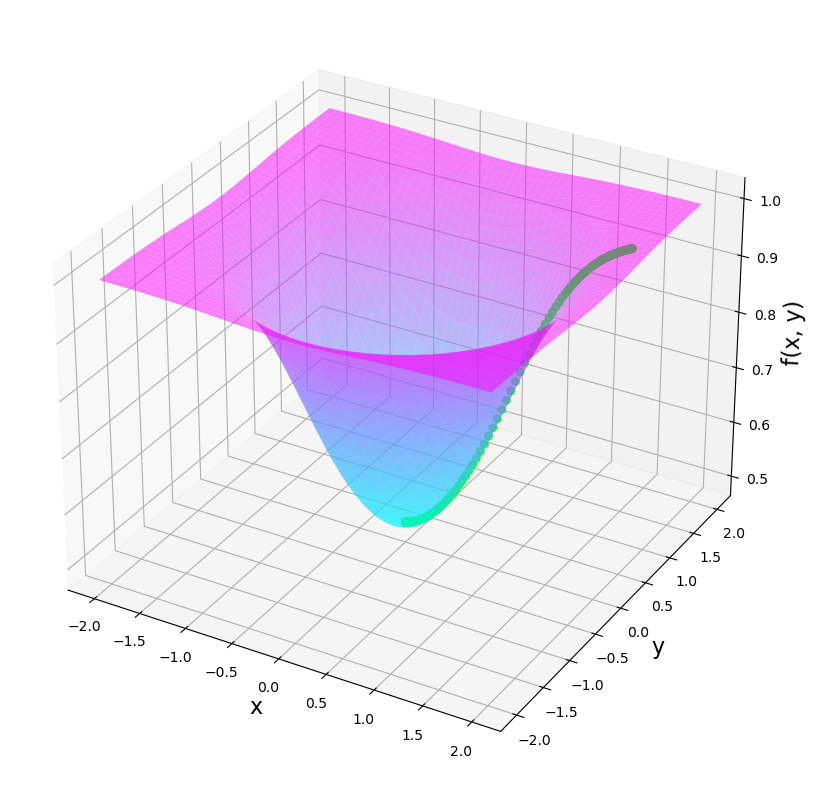

In [25]:
# Generating 3D plot
fig=plt.figure(figsize=[10, 10])
axes=fig.gca(projection="3d")

axes.set_xlabel("x", fontsize=16)
axes.set_ylabel("y", fontsize=16)
axes.set_zlabel("f(x, y)", fontsize=16)
axes.plot_surface(x_4, y_4, f(x_4, y_4), cmap=cm.cool, alpha=0.5)
values_x, values_y=values_array[:, 0], values_array[:, 1]
axes.scatter(values_x, values_y,
            f(values_x, values_y), color="lime", s=30, alpha=0.8)
plt.show()

## Not an example - A real cost function
## Mean Square Error (MSE)
### $MSE = \frac{1}{n}\sum_{i=1}^{n} \big( y_{i} - h_\theta (x_{i})\big)^2$ 
###              $\space\space =\frac{1}{n}\sum_{i=1}^{n} \big( y_{i} - y\hat\space\big)^2$
#### where $y\hat\space = h_\theta(x) = \theta_0 + \theta_1(x)$

In [27]:
#Making sample data
X = np.array([0.1, 1.2, 2.4, 3.2, 4.1, 5.7, 6.5]).reshape(7, 1)
y = np.array([1.7, 2.4, 3.5, 3.0, 6.1, 9.4, 8.2]).reshape(7, 1)

In [32]:
model = LinearRegression()
model.fit(X, y)

print("Theta 0 (intercept) : ", model.intercept_[0])
print("Theta 1 (slope) : ", model.coef_[0][0])

Theta 0 (intercept) :  0.8475351486029536
Theta 1 (slope) :  1.2227264637835915


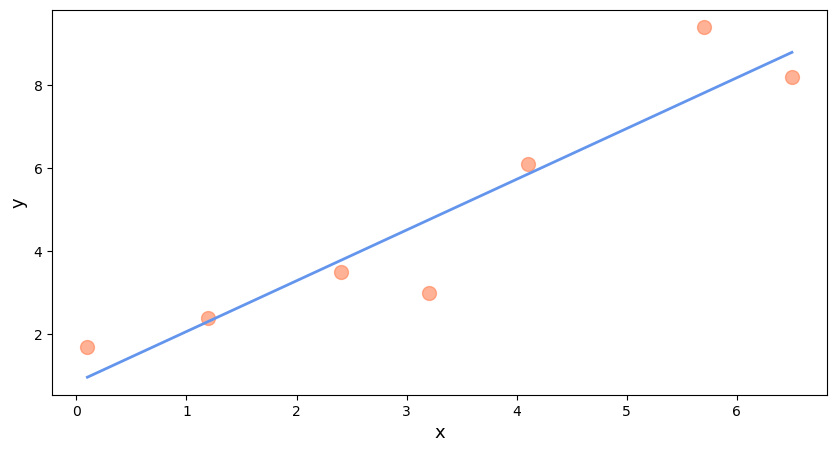

In [34]:
plt.figure(figsize=[10, 5])
plt.title("", fontsize=16)
plt.xlabel("x", fontsize=13)
plt.ylabel("y", fontsize=13)
plt.scatter(X, y, color="coral", s=100, alpha=0.6)
plt.plot(X, model.predict(X), color="cornflowerblue", linewidth=2)

plt.show()

In [36]:
theta0 = model.intercept_[0]
theta1 = model.coef_[0][0]

y_hat = theta0 + theta1*X
print(model.predict(X) == y_hat)

[[ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]]


In [42]:
def mse(y, y_hat):
    return (1/len(y)) * sum((y-y_hat)**2)

print(mse(y, y_hat))
print(mean_squared_error(y, y_hat))

[0.94796558]
0.9479655759794577


### 3D plot for MSE cost function

In [48]:
#Make data for thetas using numpy
num_thetas=200
theta_0 = np.linspace(start=-1, stop=3, num=num_thetas)
theta_1 = np.linspace(start=-1, stop=3, num=num_thetas)

plot_t0, plot_t1 = np.meshgrid(theta_0, theta_1)
# print(plot_t0)
# print(plot_t1)

In [49]:
#
plot_cost=np.zeros((num_thetas, num_thetas))
for i in range(num_thetas):
    for j in range(num_thetas):
        y_hat=plot_t0[i][j] + plot_t1[i][j]*X
        plot_cost[i][j]=mse(y, y_hat)

C:\Users\KIIT\AppData\Local\Temp\ipykernel_31092\1721007300.py:3: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  axes=fig.gca(projection="3d")


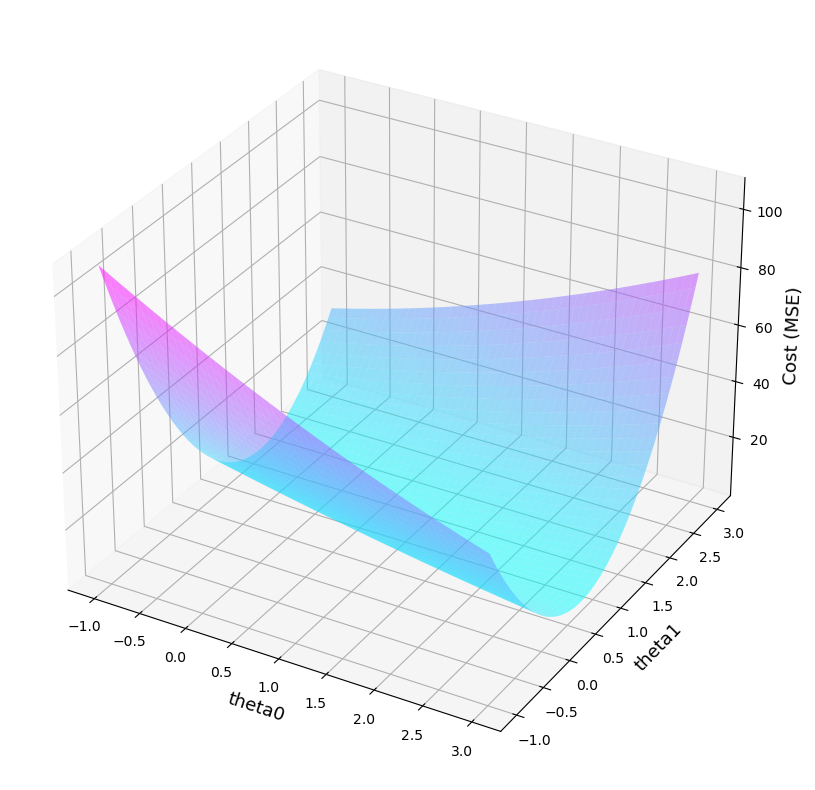

In [52]:
#Plotting MSE cost function
fig=plt.figure(figsize=[10, 10])
axes=fig.gca(projection="3d")

axes.set_xlabel("theta0", fontsize=13)
axes.set_ylabel("theta1", fontsize=13)
axes.set_zlabel("Cost (MSE) ", fontsize=13)
axes.plot_surface(plot_t0, plot_t1, plot_cost, cmap=cm.cool, alpha=0.5)

plt.show()

In [57]:
print("Min value of plot cost: ", plot_cost.min())
ij_min=np.unravel_index(indices=plot_cost.argmin(), shape=plot_cost.shape)
i_min, j_min = ij_min[0], ij_min[1]
print("Min occurs at (i, j): ", ij_min)
print(f"At Min,\ntheta0 = {plot_t0[i_min][j_min]}, theta1 = {plot_t1[i_min][j_min]}")

Min value of plot cost:  0.9483826526747163
Min occurs at (i, j):  (111, 91)
At Min,
theta0 = 0.829145728643216, theta1 = 1.2311557788944723


## Partial derivatives of MSE wrt $\theta_0$ & $\theta_1$
### $\frac{\partial MSE}{\partial \theta_0} = - \frac{2}{n} \sum_{i=1}^{n} \big( y_{i} - \theta_0 - \theta_1 x_{i} \big)$
### $\frac{\partial MSE}{\partial \theta_1} = - \frac{2}{n} \sum_{i=1}^{n} \big( y_{i} - \theta_0 - \theta_1 x_{i} \big) \big( x_{i} \big)$

In [63]:
# x values (a list), y values (a list), array of thetas ( array of lists(theta0, theta1)) 
def grad(x, y, thetas):
    n=y.size
    thetas_0=thetas[0]
    thetas_1=thetas[1]
    theta0_slopes = (-2/n) * sum(y - thetas_0 - thetas_1*x)
    theta1_slopes = (-2/n) * sum(y - thetas_0 - thetas_1*x) * x
    
    return np.array([theta0_slopes[0], theta1_slopes[1]], dtype=object)

In [72]:
multiplier = 0.01
thetas = np.array([2.9, 2.9])  #Initial guess

plot_vals=thetas.reshape(1, 2)
mse_vals=mse(y, thetas[0]+thetas[1]*X)

for i in range(1000):
    thetas = thetas - multiplier*grad(X, y, thetas)
    
    plot_vals=np.concatenate((plot_vals, thetas.reshape(1, 2)), axis=0)
    mse_vals=np.append(arr=mse_vals, values=mse(y, thetas[0]+thetas[1]*X))
    
print(f"Min occurs at theta0 = {thetas[0]}, theta1 = {thetas[1]}")
print("MSE at these thetas = ", mse(y, thetas[0]+thetas[1]*X))

Min occurs at theta0 = 1.3707233065442026, theta1 = [1.06486797]
MSE at these thetas =  [1.0622689]


C:\Users\KIIT\AppData\Local\Temp\ipykernel_31092\2975608802.py:3: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  axes=fig.gca(projection="3d")


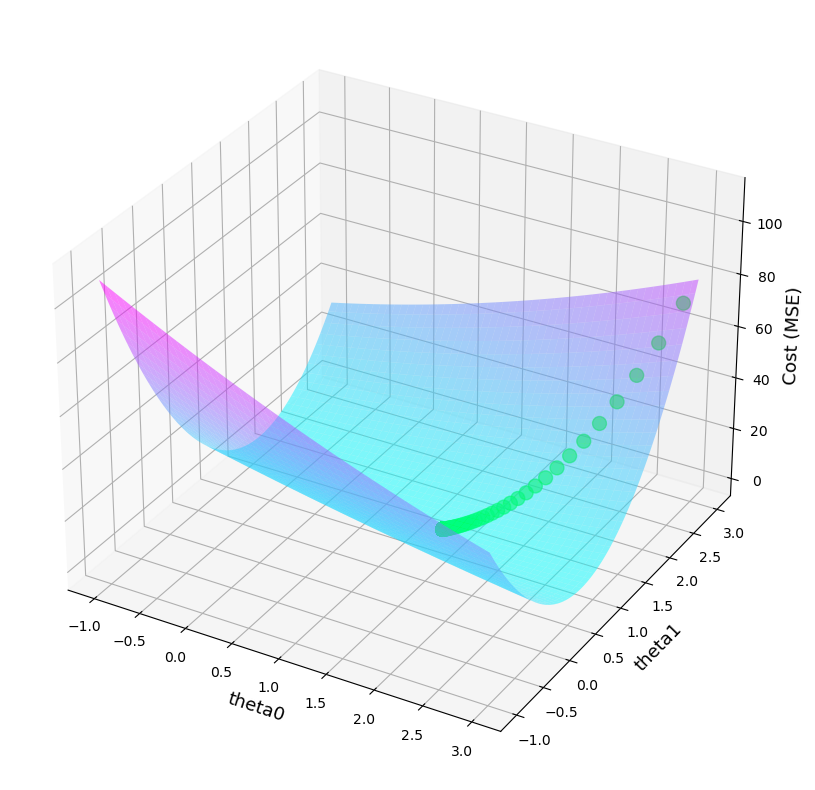

In [79]:
#Plotting MSE cost function
fig=plt.figure(figsize=[10, 10])
axes=fig.gca(projection="3d")

axes.set_xlabel("theta0", fontsize=13)
axes.set_ylabel("theta1", fontsize=13)
axes.set_zlabel("Cost (MSE) ", fontsize=13)
axes.plot_surface(plot_t0, plot_t1, plot_cost, cmap=cm.cool, alpha=0.5)
axes.scatter(plot_vals[:, 0], plot_vals[:, 1], mse_vals, color="lime", s=100, alpha=0.6)

plt.show()

idk what i did in this last part :)